## **TASK 2 - Prediction using Unsupervised ML**

To predict the optimum number of clusters and represent it visually.
##### Dataset: Iris

**Submitted By: Madhura KR** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#StandardSccaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/My Drive/Iris.csv',encoding= 'unicode_escape')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


EDA and Data pre processing

In [ ]:
df.drop(['species'], axis=1, inplace = True) 

Clustering is an unsupervised technique, therefore we do not require labels in our dataset.

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Shape of the dataset
df.shape

(150, 4)

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
#Finding missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

The above dataframe shows that the data does not have any missing values and need no data imputation.

#### Outlier detection and removal

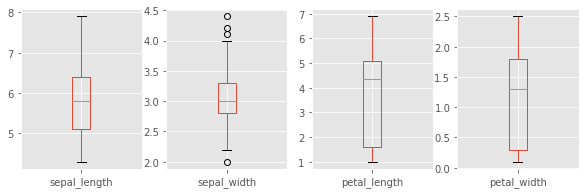

In [ ]:
df.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(10,10), layout=(3,4))
plt.show()

Most of the outliers can be filtered using the filtering criteria of a boxplot to classify the point as an outlier. The criteria of a box plot for classifying a point as an outlier is if the point is greater than  Q3+(1.5∗IQR)  or lower than  Q1−(1.5∗IQR)  where, where  Q1=FirstQuartile   Q3=ThirdQuartile. 

original shape of dataset : (150, 4)
filtered dataset shape :  (146, 4)


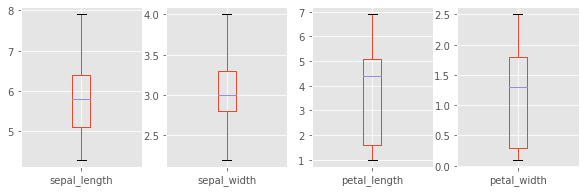

In [ ]:
print('original shape of dataset :',df.shape)

new_df=df.copy()

#criteria
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3-Q1
max_ = Q3+1.5*IQR
min_ = Q1-1.5*IQR
#filter the outlier s
condition = (new_df <= max_) & (new_df >= min_)
condition = condition.all(axis=1)
df= df[condition]
print('filtered dataset shape : ',df.shape)
df.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(10,10), layout=(3,4))
plt.show()

Four outliers have been removed.

In [ ]:
#Checking for inconsistent data types
df.dtypes 

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.036986,3.807534,1.219863
std,0.834093,0.395145,1.757117,0.760365
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


**Check the distribution of the variables**

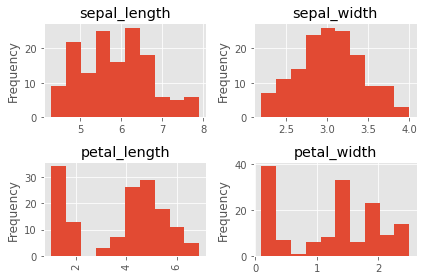

In [ ]:
plt.subplot(2,2,1)
df['sepal_length'].plot(kind='hist')
plt.title('sepal_length')
plt.subplot(2,2,2)
df['sepal_width'].plot(kind='hist')
plt.title('sepal_width')
plt.subplot(2,2,3)
df['petal_length'].plot(kind='hist')
plt.xticks(rotation = 90)
plt.title('petal_length')
plt.subplot(2,2,4)
df['petal_width'].plot(kind='hist')
plt.title('petal_width')
plt.tight_layout()
plt.show()

**Removing the skewness by performing log transformation on the variables**

In [ ]:
data_log = np.log(df)
data_log.head()

,sepal_length,sepal_width,petal_length,petal_width
0,1.629241,1.252763,0.336472,-1.609438
1,1.589235,1.098612,0.336472,-1.609438
2,1.547563,1.163151,0.262364,-1.609438
3,1.526056,1.131402,0.405465,-1.609438
4,1.609438,1.280934,0.336472,-1.609438


**Standardizing the variables using StandardScaler() for equal variance and mean**

In [ ]:
# Initialize a scaler
scaler = StandardScaler()
# Fit the scaler
scaler.fit(data_log)
# Scale and center the data
data_normalized = scaler.transform(data_log)
# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data_log.index, columns=data_log.columns)
# Print summary statistics
data_normalized.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,146.00,146.00,146.00,146.00
mean,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-2.11,-2.40,-2.04,-2.21
25%,-0.91,-0.56,-1.23,-1.08
50%,0.00,-0.03,0.50,0.42
75%,0.70,0.70,0.75,0.75
max,2.18,2.17,1.27,1.09


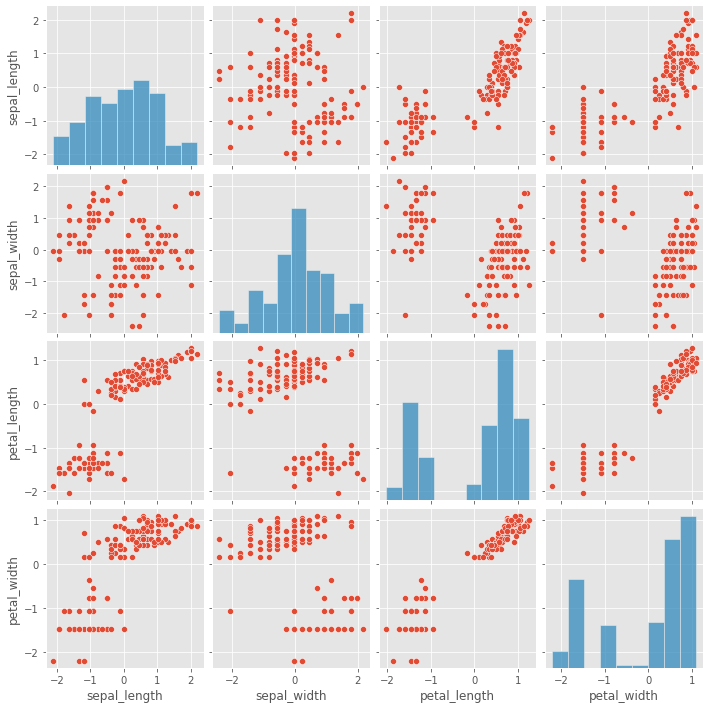

In [ ]:
import seaborn as sns
sns.pairplot(data_normalized)


There is positive correlation between the petal-length and petal-width column which is a good indicator for clustering.
**First,  only these two attributes will be used for clustering because that way, it will be easier for us to plot the data.**

**Finding the optimal k**

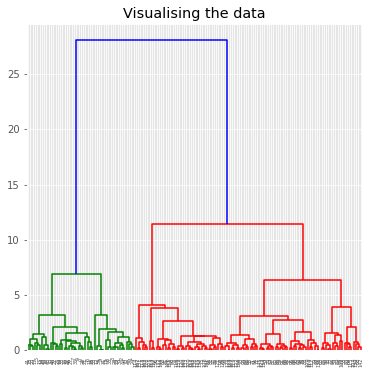

In [ ]:
# Method 1
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(data_normalized, method ='ward'))) 

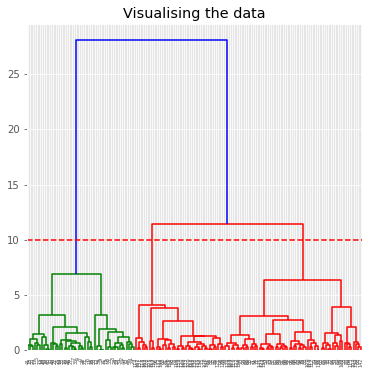

In [ ]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(data_normalized, method ='ward'))) 
plt.axhline(10, color='r', linestyle='--')

The threshold is set in such a way that it cuts the tallest vertical line.Therefore, k=3.

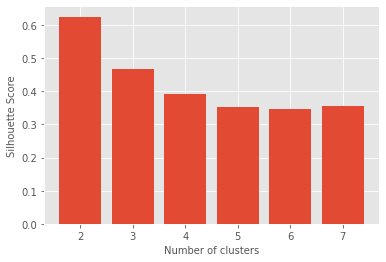

In [ ]:
#Method 2
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 
silhouette_scores = [] 
for n_cluster in range(2, 8):
  silhouette_scores.append(silhouette_score(data_normalized, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(data_normalized))) 

# Plotting a bar graph to compare the results 


k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In practice, it means that if we choose n_clusters=2, the task of going from 3 to 2 clusters will merge some very far-apart points, which may not be a good choice.

It has been verified that optimal k=3.

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_normalized)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
# Extract cluster labels
cluster_labels = cluster.labels_

# Assigning Cluster Labels to Raw Data
# Create a DataFrame by adding a new cluster label column
data_ = df.assign(Cluster=cluster_labels)
data_.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Group the data by cluster
grouped = data_.groupby(['Cluster'])
grouped.agg({'sepal_length': 'mean','sepal_width': 'mean','petal_length': 'mean','petal_width': ['mean', 'count']}).round(2)

sepal_length sepal_width petal_length petal_width      
                mean        mean         mean        mean count
Cluster                                                        
0               4.98        3.37         1.46        0.24    47
1               5.90        2.70         4.50        1.47    60
2               6.85        3.15         5.56        2.01    39

In [ ]:
from sklearn import metrics
sil_score1 = metrics.silhouette_score(data_normalized, cluster_labels, metric='euclidean')
sil_score1

0.465874695931058

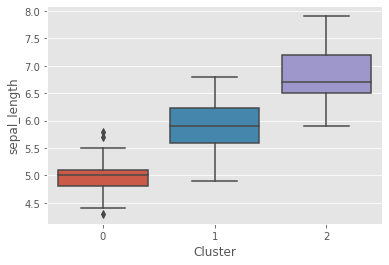

In [ ]:
sns.boxplot(x='Cluster', y='sepal_length', data=data_)

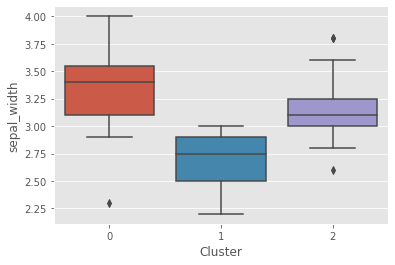

In [ ]:
sns.boxplot(x='Cluster', y='sepal_width', data=data_)

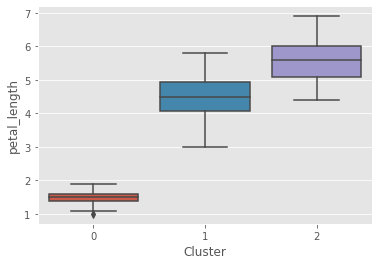

In [ ]:
sns.boxplot(x='Cluster', y='petal_length', data=data_)

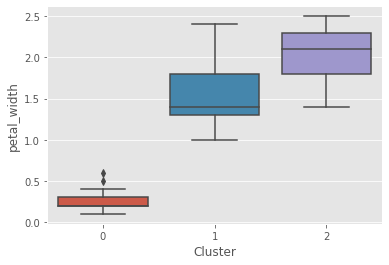

In [ ]:
sns.boxplot(x='Cluster', y='petal_width', data=data_)

In [ ]:
# %matplotlib notebook    #to make plot interactive
data_normalized=pd.DataFrame(data_normalized)
data_normalized['Cluster']=data_['Cluster'].values

Since there are four features selected, visualization ia difficult. With just three features would also have been easily implemented with respect to visualization, but 4 dimensional plot is difficult to implement and interpret.

***Inferences:***

---

* Four outliers detected have been removed.
* The data pre processing connsists of Checking the distribution of the features, removing the skewness and normalizing the dataset before the implementation of Hierarchiacal AgglomerativeClustering .
* The dendogram and further the silhouette_score suggests that the optimal number of clusters is three.
* In practice, it means that if we choose n_clusters=2, the task of going from 3 to 2 clusters will merge some very far-apart points, which may not be a good choice. 
It has been verified that optimal k=3.


* When all the clusters are considered, silhouette_score is 46.58%.
* When all the clusters are considered,

Cluster 0: Low sepal length, high sepal width,low petal length and low petal width.

Cluster 1: Moderate sepal length, low sepal width,moderate  petal length and moderate petal width.

Cluster 2: High sepal length, moderate sepal width, high petal length and high petal width.
